In [26]:
import pickle
with open('/content/drive/MyDrive/멀티모달 감정분석/text_data.pkl',"rb") as fr:
    d = pickle.load(fr)
d

,Segment ID,text,sentiment
0,Sess01_script01_User002M_001,나는 어 어머니 엄마가 이제 생일 때마다 이제 미역국도 많이 해서 미역국을 되게 좋...,0
1,Sess01_script01_User002M_002,전에도 말했지만 그래서 미역국이랑 볶음김치 막 해주셔서 맨날 그렇게 차려주시는데 어...,0
2,Sess01_script01_User002M_003,어 응 거기를 되게 엄 집 앞에 그 조그만한 가게로 있었는데 거기를 엄청 생일 때...,0
3,Sess01_script01_User002M_004,거기서 엄마랑 둘이 생일 파티 그냥 간단하게 하는 경우도 있었고 보 음 보통 그렇...,0
4,Sess01_script01_User001F_001,아 친구들도,0
...,...,...,...
13435,Sess40_script06_User079F_043,뭔가 막 그게 그니까 완전 대중화가 된 시대가 된 거야,0
13436,Sess40_script06_User079F_044,그 게임 속 그 스토리 상에서는,0
13437,Sess40_script06_User079F_045,근데 그게 너무 저렴하고 하니까 다 갈아 치우고 막 내 아내처럼 그니까 내가 아내가...,0
13438,Sess40_script06_User079F_046,왜냐면 내 아내를 대신할 사람이 있는 거야,0


In [27]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 52.6 MB/s eta 0:00:00


In [29]:
from konlpy.tag import Okt
okt = Okt()

In [30]:
tokenized_text=[]
for sentence in tqdm(d['text']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    tokenized_text.append(tokenized_sentence)

100%|██████████| 13440/13440 [00:43<00:00, 310.47it/s]


In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_text)

In [9]:
print(tokenizer.word_index)

{'이': 1, '가': 2, '그': 3, '거': 4, '는': 5, '에': 6, '어': 7, '나': 8, '뭐': 9, '도': 10, '막': 11, '을': 12, '이제': 13, '근데': 14, '아': 15, '들': 16, '를': 17, '안': 18, '그런': 19, '내': 20, '좀': 21, '때': 22, '진짜': 23, '애': 24, '그냥': 25, '게': 26, '사람': 27, '은': 28, '생각': 29, '한': 30, '말': 31, '이렇게': 32, '다': 33, '그래서': 34, '엄마': 35, '하고': 36, '그거': 37, '같': 38, '에서': 39, '많이': 40, '우리': 41, '그니까': 42, '하는': 43, '응': 44, '약간': 45, '고': 46, '거야': 47, '한테': 48, '되게': 49, '것': 50, '해': 51, '잘': 52, '그때': 53, '이런': 54, '그렇게': 55, '적': 56, '너': 57, '너무': 58, '으로': 59, '또': 60, '랑': 61, '아빠': 62, '할': 63, '더': 64, '그게': 65, '얘기': 66, '못': 67, '나도': 68, '로': 69, '저': 70, '지': 71, '난': 72, '니까': 73, '있는': 74, '꼰대': 75, '라고': 76, '지금': 77, '수': 78, '친구': 79, '자기': 80, '야': 81, '집': 82, '같은': 83, '그래': 84, '만': 85, '딱': 86, '맞아': 87, '아니': 88, '코': 89, '네': 90, '같이': 91, '인': 92, '서': 93, '그리고': 94, '있어': 95, '뭔가': 96, '번': 97, '어떻게': 98, '거기': 99, '이야': 100, '의': 101, '엄청': 102, '일': 103, '이랑': 104, '그래가지고': 10

In [10]:
tokenizer.word_index['친구']

79

In [32]:
tokenized_text= tokenizer.texts_to_sequences(tokenized_text)

텍스트의 최대 길이 : 132
텍스트트의 평균 길이 : 13.46376488095238


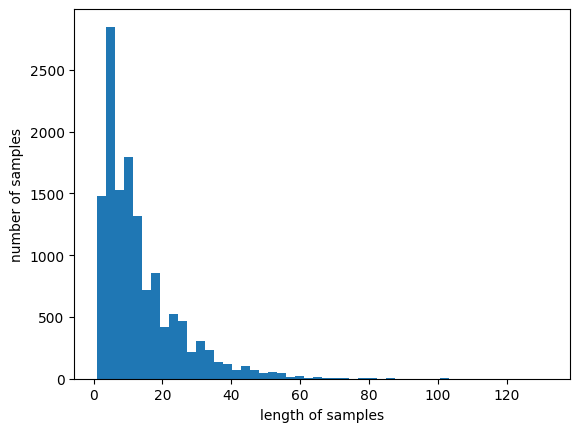

In [36]:
import matplotlib.pyplot as plt
print('텍스트의 최대 길이 :',max(len(text) for text in tokenized_text))
print('텍스트트의 평균 길이 :',sum(map(len, tokenized_text))/len(tokenized_text))
plt.hist([len(text) for text in tokenized_text], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [38]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))
max_len = 50
below_threshold_len(max_len, tokenized_text)

전체 샘플 중 길이가 50 이하인 샘플의 비율: 98.57142857142858


In [39]:
#패딩하기
from tensorflow.keras.preprocessing.sequence import pad_sequences
x = pad_sequences(tokenized_text, maxlen=50,padding='post')
x

array([[  11,    8,   10, ...,    0,    0,    0],
       [ 145,  251,   36, ...,    0,    0,    0],
       [  10,   48,  110, ...,    0,    0,    0],
       ...,
       [  17,   75,   64, ...,    0,    0,    0],
       [ 302,   24, 1320, ...,    0,    0,    0],
       [ 104,   24,  592, ...,    0,    0,    0]], dtype=int32)

In [40]:
d['token']=pd.DataFrame({'token':x.tolist()})

In [41]:
d

,Segment ID,text,sentiment,token
0,Sess01_script01_User002M_001,나는 어 어머니 엄마가 이제 생일 때마다 이제 미역국도 많이 해서 미역국을 되게 좋...,0,"[11, 8, 10, 278, 42, 3, 16, 670, 26, 281, 16, ..."
1,Sess01_script01_User002M_002,전에도 말했지만 그래서 미역국이랑 볶음김치 막 해주셔서 맨날 그렇게 차려주시는데 어...,0,"[145, 251, 36, 1, 41, 775, 116, 1040, 881, 14,..."
2,Sess01_script01_User002M_003,어 응 거기를 되게 엄 집 앞에 그 조그만한 가게로 있었는데 거기를 엄청 생일 때...,0,"[10, 48, 110, 22, 56, 689, 95, 230, 9, 5, 2298..."
3,Sess01_script01_User002M_004,거기서 엄마랑 둘이 생일 파티 그냥 간단하게 하는 경우도 있었고 보 음 보통 그렇...,0,"[110, 106, 42, 69, 263, 2, 670, 1776, 30, 1153..."
4,Sess01_script01_User001F_001,아 친구들도,0,"[18, 90, 19, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...
13435,Sess40_script06_User079F_043,뭔가 막 그게 그니까 완전 대중화가 된 시대가 된 거야,0,"[107, 14, 75, 47, 258, 7267, 3, 33, 641, 3, 33..."
13436,Sess40_script06_User079F_044,그 게임 속 그 스토리 상에서는,0,"[5, 493, 481, 5, 2873, 733, 295, 0, 0, 0, 0, 0..."
13437,Sess40_script06_User079F_045,근데 그게 너무 저렴하고 하니까 다 갈아 치우고 막 내 아내처럼 그니까 내가 아내가...,0,"[17, 75, 64, 7268, 1, 40, 1175, 806, 14, 24, 1..."
13438,Sess40_script06_User079F_046,왜냐면 내 아내를 대신할 사람이 있는 거야,0,"[302, 24, 1320, 22, 1237, 1, 32, 2, 6, 53, 0, ..."


In [42]:
import pickle

# 파일로 저장
with open('/content/drive/MyDrive/멀티모달 감정분석/text_tokenized.pkl', 'wb') as f:
    pickle.dump(d, f)